In [12]:
import sys
sys.path.append("../encode+decode/")
from decode import decode
import numpy as np
import tqdm
import yaml
def save_dict_to_yaml(dict_value: dict, save_path: str):
    """dict保存为yaml"""
    with open(save_path, 'w') as file:
        file.write(yaml.dump(dict_value, allow_unicode=True,default_flow_style=False))
con_map = {0:"acc+flops+params",1:"acc",2:"acc+flops",3:"acc+params",4:"flops",5:"params",6:"param+flops",7:"acc+latency"}
n = 7
res = np.load('./test.npy')
res = list(res.astype(int))
for i in range(50):
    print(n)
    print("="*10)
    config,save_path = decode((res[i][:21]),"cifar100",n=n,save=False,constrain = con_map[7])  
    n+=1
    save_dict_to_yaml(config,save_path )
    print('='*10)

7
-  0.125
-  1.0
-  0.125
-  0.875
-  0.125
-  1
-  1
-  1
-  1
-  1
8
-  1.0
-  1.0
-  0.5
-  1.0
-  1.0
-  2
-  4
-  1
-  1
-  1
9
-  0.125
-  1.0
-  0.125
-  0.875
-  0.125
-  1
-  1
-  1
-  1
-  1
10
-  0.25
-  1.0
-  0.25
-  1.0
-  0.625
-  1
-  1
-  1
-  1
-  1
11
-  1.0
-  1.0
-  0.25
-  1.0
-  0.875
-  2
-  2
-  1
-  1
-  1
12
-  1.0
-  1.0
-  0.375
-  1.0
-  1.0
-  2
-  4
-  1
-  1
-  1
13
-  1.0
-  1.0
-  0.25
-  1.0
-  0.625
-  1
-  1
-  1
-  1
-  1
14
-  1.0
-  1.0
-  0.25
-  1.0
-  1.0
-  2
-  1
-  1
-  1
-  1
15
-  1.0
-  1.0
-  0.25
-  1.0
-  0.625
-  1
-  1
-  1
-  1
-  1
16
-  0.5
-  1.0
-  0.25
-  1.0
-  1.0
-  1
-  1
-  1
-  1
-  1
17
-  1.0
-  1.0
-  0.5
-  1.0
-  1.0
-  2
-  2
-  1
-  1
-  1
18
-  0.125
-  1.0
-  0.25
-  1.0
-  0.25
-  1
-  1
-  1
-  1
-  1
19
-  1.0
-  1.0
-  0.375
-  1.0
-  1.0
-  1
-  2
-  1
-  1
-  1
20
-  1.0
-  1.0
-  0.625
-  1.0
-  1.0
-  2
-  4
-  1
-  1
-  1
21
-  1.0
-  1.0
-  0.25
-  1.0
-  1.0
-  1
-  1
-  1
-  1
-  1
22
-  0.125
-  1

In [2]:
res = np.load('./test.npy')
res[0]

array([1, 8, 1, 7, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 4,
       5, 5, 4, 5, 3, 4, 5, 5, 5], dtype=int32)

In [5]:
import yaml
def save_dict_to_yaml(dict_value: dict, save_path: str):
    """dict保存为yaml"""
    with open(save_path, 'w') as file:
        file.write(yaml.dump(dict_value, allow_unicode=True,default_flow_style=False))
save_dict_to_yaml(config,'./test.npy')

In [9]:
np.save("./test2.npy",config)

In [10]:
np.load('./test2.npy',allow_pickle=True).item()

{'dataset': 'cifar100',
 'model': {'stage_layer': [1, 1, 1, 1, 1],
  'stage_ratio': [0.5, 1.0, 0.25, 1.0, 0.75],
  'with_pool': [False, False, False, False, False, True],
  'pool_type': [None, 'None', 'None', 'None', 'None', 'maxpool'],
  'op_type': ['vgg', 'vgg', 'vgg', 'vgg', 'vgg'],
  'layer_num_max': [64, 64, 128, 256, 512]},
 'train': {'start_epoch': 0,
  'epochs': 100,
  'warmup_epochs': 0,
  'warmup_lr': 0.01,
  'lr_scheduler': {'min_lr': 1e-06, 'decay_epochs': 30, 'decay_rate': 0.1},
  'batch_size': 256,
  'loss': 'crossentropy',
  'workers': 4,
  'optimizer': {'name': 'SGD',
   'base_lr': 0.35,
   'repvgg_lr': 0.3,
   'momentum': 0.9,
   'eps': 1e-08,
   'betas': [0.9, 0.999],
   'weight_decay_param': {'base_decay': 0.0005,
    'repvgg_decay': 0.0001,
    'echo': False}},
  'label_smoothing': 0.1,
  'clip_grad': 0.0,
  'ema_alpha': 0.0,
  'ema_update_period': 8,
  'use_l2_norm': True,
  'no_weight_decay': ['rbr_dense', 'rbr_1x1']},
 'val': {'batch_size': 128, 'workers': 4},
 '

In [7]:
config['model']['stage_ratio']

[0.5, 1.0, 0.25, 1.0, 0.75]

In [38]:
def write2yaml(config,save_path):
    with open(save_path,"w") as f:
        f.write("dataset: "+config['dataset']+'\n')
        f.write("model:\n")
        f.write("  layer_num_max:\n")
        for i in range(5):
            f.write("  - "+str(config['model']['layer_num_max'][i])+'\n')
        f.write("  op_type:\n")
        for i in range(5):
            f.write("  - "+str(config['model']['op_type'][i])+'\n')
        f.write("  pool_type:\n")
        for i in range(6):
            f.write("  - "+str(config['model']['pool_type'][i])+'\n')
        f.write("  stage_layer:\n")
        for i in range(5):
            f.write("  - "+str(config['model']['stage_layer'][i])+'\n')
        f.write("  stage_ratio:\n")
        for i in range(5):
            f.write("  - "+str(config['model']['stage_ratio'][i])+'\n')
        f.write("  with_pool:\n")
        for i in range(len(config['model']['with_pool'])):
            f.write("  - "+str(config['model']['with_pool'][i])+'\n')
        f.write("output:\n")
        f.write("  dir: "+str(config['output']['dir'])+'\n')
        f.write("  epoch_print_freq: "+str(config["output"]['epoch_print_freq'])+'\n')
        f.write("  name: "+"\""+str(config['output']['name'])+"\""+"\n")
        f.write("  print_freq: "+str(config['output']['print_freq'])+'\n')
        f.write("  save_freq: "+str(config['output']['save_freq'])+'\n')
        f.write("train:\n")
        f.write("  batch_size: "+str(config['train']['batch_size'])+'\n')
        f.write("  clip_grad: "+str(config['train']['clip_grad'])+'\n')
        f.write("  ema_alpha: "+str(config['train']['ema_alpha'])+'\n')
        f.write("  ema_update_period: "+str(config['train']['ema_update_period'])+'\n')
        f.write("  epochs: "+str(config['train']['epochs'])+'\n')
        f.write("  label_smoothing: "+str(config['train']['label_smoothing'])+'\n')
        f.write("  loss: "+str(config['train']['loss'])+'\n')
        f.write("  lr_scheduler:\n")
        f.write("    decay_epochs: "+str(config['train']['lr_scheduler']["decay_epochs"])+'\n')
        f.write("    decay_rate: "+str(config['train']['lr_scheduler']["decay_rate"])+'\n')
        # f.write("    min_lr: "+str(config['train']['lr_scheduler']["min_lr"])+'\n')
        f.write("    min_lr: "+str(0.000001)+'\n')
        
        f.write("  no_weight_decay:\n")
        for i in range(len(config['train']['no_weight_decay'])):
            f.write("  - "+str(config['train']['no_weight_decay'][i])+'\n')
        f.write("  optimizer:\n")
        f.write("    base_lr: "+str(config['train']['optimizer']['base_lr'])+'\n')
        f.write("    betas:\n")
        for i in range(len(config['train']['optimizer']['betas'])):
            f.write("    - "+str(config['train']['optimizer']['betas'][i])+'\n')
        f.write("    eps: "+str(config['train']['optimizer']['eps'])+'\n')
        f.write("    momentum: "+str(config['train']['optimizer']['momentum'])+'\n')
        f.write("    name: "+str(config['train']['optimizer']['name'])+'\n')
        # f.write("    repvgg_lr: "+str(config['train']['optimizer']['repvgg_lr'])+'\n')
        f.write("    repvgg_lr: "+str(0.00000001)+'\n')
        
        f.write("    weight_decay_param:\n")
        f.write("      base_decay: "+str(config['train']['optimizer']['weight_decay_param']['base_decay'])+'\n')
        f.write("      echo: "+str(config['train']['optimizer']['weight_decay_param']['echo'])+'\n')
        f.write("      repvgg_decay: "+str(config['train']['optimizer']['weight_decay_param']['repvgg_decay'])+'\n')
        f.write("  start_epoch: "+str(config['train']['start_epoch'])+'\n')
        f.write("  use_l2_norm: "+str(config['train']['use_l2_norm'])+'\n')
        f.write("  warmup_epochs: "+str(config['train']['warmup_epochs'])+'\n')
        f.write("  warmup_lr: "+str(config['train']['warmup_lr'])+'\n')
        f.write("  workers: "+str(config['train']['workers'])+'\n')
        f.write('val:\n')
        f.write("  batch_size: "+str(config['val']['batch_size'])+'\n')
        f.write("  workers: "+str(config['val']['workers'])+'\n')
        
    f.close()
    

In [34]:
print("\"")

"


In [5]:
import torch
import numpy as np
import os
acc = np.zeros(200)
for p in os.listdir('/home/qhy/Reserach/AICAS/config/search-best-cifar100'):
    num = int(p.split('-')[0])
    if 6<num<107:
        params = torch.load('/home/qhy/Reserach/AICAS/log/search-best/'+p.replace('.yaml','')+'/best_ckpt.pth')
        acc[num] = params['max_accuracy']

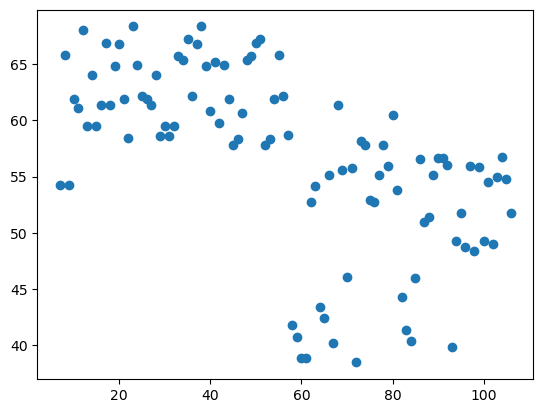

In [6]:
import matplotlib.pyplot as plt
plt.scatter(range(7,107),acc[7:107])

In [7]:
for p in os.listdir('/home/qhy/Reserach/AICAS/config/search-best-cifar100'):
    num = int(p.split('-')[0])
    if 107<num:
        print("python3 train.py --config ./config/cifar100/"+p)

python3 train.py --config ./config/cifar100/132-stage-2_3_2_2_2-ratio-1.0_1.0_0.5_0.875_0.5-op-repvgg_vgg_vgg_vgg_vgg-pool-False_False_True_False_False_False-pool_type-None_None_avgpool_None_None_None-cifar100.yaml
python3 train.py --config ./config/cifar100/139-stage-2_2_2_2_2-ratio-1.0_0.875_0.5_0.875_0.5-op-vgg_vgg_vgg_vgg_vgg-pool-False_False_False_False_False_False-pool_type-None_None_None_None_None_None-cifar100.yaml
python3 train.py --config ./config/cifar100/112-stage-2_2_2_2_2-ratio-1.0_1.0_0.5_0.875_0.5-op-vgg_vgg_vgg_vgg_vgg-pool-False_False_False_False_False_False-pool_type-None_None_None_None_None_None-cifar100.yaml
python3 train.py --config ./config/cifar100/122-stage-2_4_2_2_2-ratio-1.0_1.0_0.5_0.875_0.5-op-repvgg_vgg_vgg_vgg_vgg-pool-False_False_False_False_False_False-pool_type-None_None_None_None_None_None-cifar100.yaml
python3 train.py --config ./config/cifar100/118-stage-2_4_2_2_2-ratio-1.0_1.0_0.5_0.875_0.5-op-repvgg_vgg_vgg_vgg_vgg-pool-False_False_True_False_True